# Introduction to Data Science

Before you hand this problem in, make sure everything runs as expected. You should **restart the kernel and run all cells** by selecting 

`Kernel --> Restart Kernel and Run All Cells`

in the menubar.

- Of course, you should use **an appropriate kernel** on the Jupyterhub of the math department or locally, so that the right modules are used and the calculations can be checked deterministically.  
- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
- Rename this problem sheet as follows:

      ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
  for example
    
      ps02_blja_problem1
    
- Please fill out the cell below for **every submission**.

**Change in submission of files**: Please upload this submission until next Tuesday to your shared Nextcloud [https://tuc.cloud/](https://tuc.cloud/) directory with the name of your username which has been created during the third exercise lab.
If you have not yet been assigned to a shared Nextcloud folder, please contact me via email (jan.blechschmidt@mathematik.tu-chemnitz.de) as soon as possible.

In [1]:
NAME = "Tanay Maurya"
EMAIL = "tanay.maurya@s.2024.tu-chemnitz.de"
USERNAME = "tanay@tu-chemnitz.de"

---

# Introduction to Data Science
## Lab 7: Logistic regression
### Part B: Logistic regression in practice

In this lab, we want to investigate the `Default` data set known from the lecture.
It contains the predictors
- `student` status, either `'Yes'` or `'No'`
- `balance`, i.e., monthly credit card balance
- yearly `income`
  
and the response
- `default`, which is either `'Yes'` or `'No'`

We first load the necessary modules.

By the way, the command
    
    plt.rcParams['figure.figsize'] = [13, 5]
    
changes the default size of figures (in inches).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

**Task**: Download the file `Default.csv`.
Read it using the `pandas` function `read_csv` and store the `pandas DataFrame` in the variable `D`.
Make sure that:
- the index column is recognized appropriately.
- the column titles are correct

In [8]:
# YOUR CODE HERE
D = pd.read_csv('Default.csv',index_col = 0)
D['balance'] = D['balance'].str.replace(',','.').astype(float)
D['income'] = D['income'].str.replace(',', '.').astype(float)

In [9]:
assert 'D' in locals()
assert isinstance(D.index, pd.Index)
# This cell contains further tests, don't remove!

**Task**: Inspect the data using the methods you've learned so far, e.g., `describe`, `hist`, `head`, etc.

            balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495
  default student      balance        income
1      No      No   729.526495  44361.625074
2      No     Yes   817.180407  12106.134700
3      No      No  1073.549164  31767.138947
4      No      No   529.250605  35704.493935
5      No      No   785.655883  38463.495879


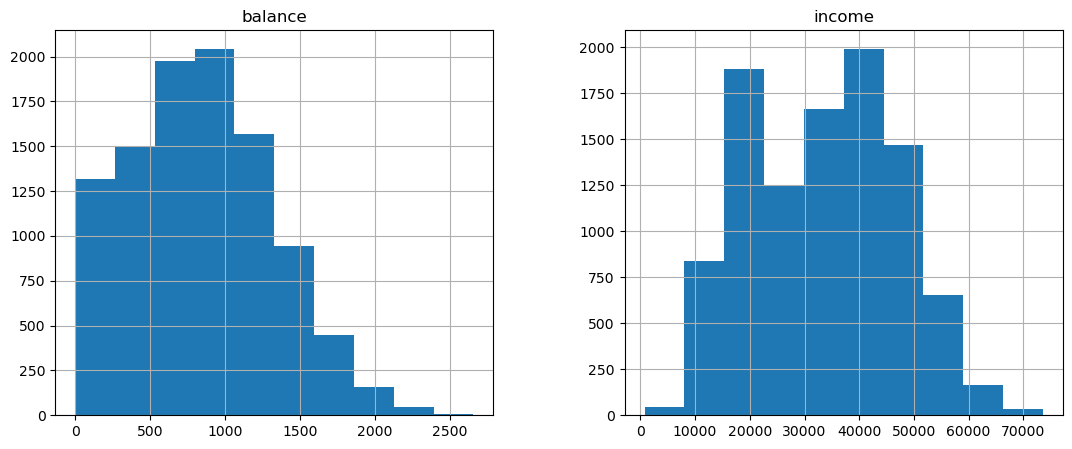

In [10]:
print(D.describe())
D.hist()
print(D.head())

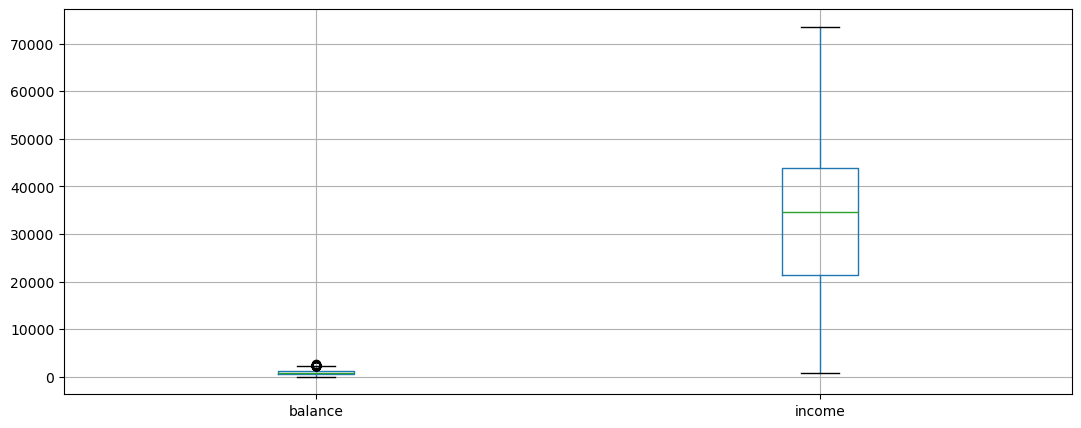

In [11]:
# Task: Apply here at least two different methods to inspect the data set D

# YOUR CODE HERE
D.boxplot();

In [12]:
D.describe(include='all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462903
50%,NaN,NaN,823.636973,34552.644802
75%,NaN,NaN,1166.308386,43807.729272


You should observe that the method `describe` only contains the predictors `balance` and `income`, but not  `default` and `student`.

This is due to the fact that these values were read in by the `read_csv` function as **strings**.
We know from the lecture that these predictors are categorical (in particular binary).

In order to process these values we convert them to the data type `boolean`, i.e., we replace the `String` objects in the columns `default` and `student` by `Boolean`'s.
There are a lot of ways to accomplish this task; the easiest might be

    D.replace(to_replace='No', value=False, inplace=True)
    
**Task**: Replace every 'No' and 'Yes' in the `DataFrame` by the values `False` and `True`, resp.

**Note**: You can ignore the deprecation warning for now, since there is no replacement available yet.

In [43]:
# YOUR CODE HERE
D.replace(to_replace='No', value=False, inplace=True)
D.replace(to_replace='Yes', value=True, inplace=True)

C:\Users\Shobhit Maurya\AppData\Local\Temp\ipykernel_21076\2142365622.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D.replace(to_replace='Yes', value=True, inplace=True)


In [44]:
assert D.student.dtype == 'bool'
assert D.default.dtype == 'bool'
# This cell contains further tests, don't remove!

### Answer the following questions!

Store your answers in the given variables

**Question A**: How many students belong to the data set?

In [45]:
# answer_A = 
# YOUR CODE HERE
answer_A = len(D)
answer_A

10000

In [46]:
assert 'answer_A' in locals()
# This cell contains further tests, don't remove!

**Question B**: What is the mean **balance** of all samples?

In [47]:
# answer_B = 
# YOUR CODE HERE
answer_B = D['balance'].mean()
print(answer_B)

835.3748856125571


In [48]:
assert 'answer_B' in locals()
# This cell contains further tests, don't remove!

**Question C**: What is the mean income of the **students**?

In [49]:
# answer_C =
# YOUR CODE HERE
answer_C = D['income'].mean()
print(answer_C)

33516.981875960504


In [50]:
assert 'answer_C' in locals()
# This cell contains further tests, don't remove!

**Question D**: How many **students** obtain an **income** of more than 20,000.

In [51]:
# answer_D = 
# YOUR CODE HERE
answer_D = len(D['income']>20000)
print(answer_D)

10000


In [52]:
assert 'answer_D' in locals()
# This cell contains further tests, don't remove!

**Question E**: What is the 25% quantile of the predictor **balance**?

In [53]:
# answer_E = 
# YOUR CODE HERE
answer_E = D['balance'].quantile(0.25)
print(answer_E)

481.731105054518


In [54]:
assert 'answer_E' in locals()
# This cell contains further tests, don't remove!

### Plotting the data set

Next, we want to plot both, the `income` and `balance` predictors as boxplots as a function of the `default` status.

**Task**: Complete the plotting command in the following cell. What do you observe?

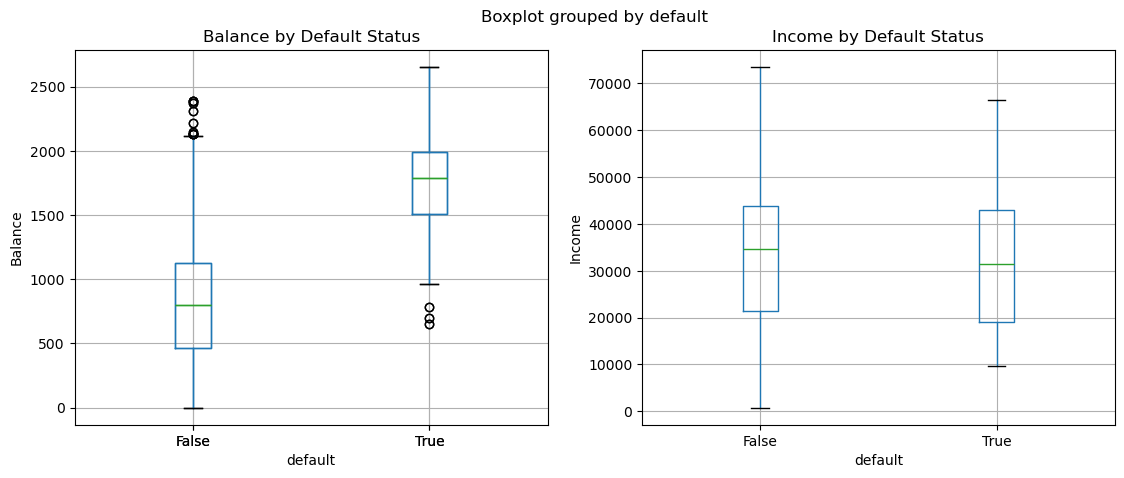

In [55]:
fig, ax = plt.subplots(1,2)
D.boxplot(column='balance',by='default', ax=ax[0]);
# YOUR CODE HERE
D.boxplot(column='balance', by='default', ax=ax[0])
ax[0].set_title('Balance by Default Status')
ax[0].set_ylabel('Balance')

D.boxplot(column='income', by='default', ax=ax[1])
ax[1].set_title('Income by Default Status')
ax[1].set_ylabel('Income')
plt.show();

You should observe that it seems that the credit card balance has a large effect on the default status, while the income seems not to predict the default status very well.

Finally, the following cell let's you plot the `default`'s vs. the non-`default`'s of the data set. No task here!

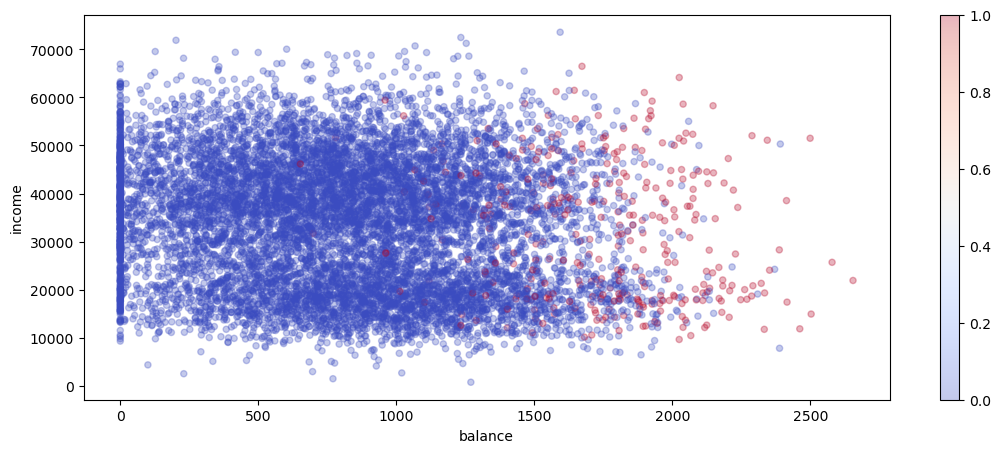

In [56]:
D.plot.scatter(y='income', x='balance',c = D.default,  alpha=0.3, cmap = 'coolwarm', marker='o');

### Fitting a logistic regression model
Next, we want to fit a logistic regression model to our data.
Use the `LogisticRegression` function in the module `sklearn.linear_model`.
The behaviour is similar to a `LinearRegression` fit.

You can find the documentation of this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
There are a lot of optional arguments, the most important might be the unimpressive looking parameter `C`, which determines the strength of regularization used in the algorithm that solves the maximum likelihood problem.

We will discuss regularization later in the lecture as well as in the labs. For now, it suffices if you keep the following in mind:

**The larger you choose `C`, the less the problem will be regularized.**

**Task**: Fit a logistic regression model that predicts the probability of `default` using `balance` as predictor. You should obtain the following values: $\beta_0: -10.6513$, $\beta_\text{balance}: 0.0055$.

Choose the following optional parameters:
* set the regularization parameter `C = 1e10` (which is the scientific notation of $C = 10^{10}$, and thus very large)
* set the error tolerance to `tol=1e-10`
* set the solver to `solver = 'liblinear'`

in this and the upcoming problems.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X = D[['balance']]  # Predictor
y = D['default']    # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Initialize the LogisticRegression model
log_reg = LogisticRegression(C=1e10, tol=1e-10, solver='liblinear', class_weight='balanced')

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1] 

# Print the coefficient for the balance feature (beta_balance)
beta_balance = log_reg.coef_[0][0]  # The first feature (balance) coefficient
print(f"Beta for balance: {beta_balance}")

# Print the intercept (beta_0)
beta_0 = log_reg.intercept_[0]
print(f"Intercept (beta_0): {beta_0}")

Beta for balance: 0.005804272934985826
Intercept (beta_0): -7.7204771457495625


**Task**: Store the intercept of the model in a variable `intercept0` and the regression coefficient in the variable `reg_coef0`.
These quantities represent the coeffcients for a linear regression model predicting the log-odds, i.e.

$$
\log \left( \frac{p(x)}{1-p(x)} \right) = \beta_0 + \beta_1 \, x
$$

In [61]:
# intercept0 =
# reg_coef0 = 
# YOUR CODE HERE
intercept0 = log_reg.intercept_
reg_coef0 = log_reg.coef_ 

In [62]:
assert 'intercept0' in locals()
assert 'reg_coef0' in locals()
# This cell contains further tests, don't remove!

**Task**:
Predict the *probability of default (pod)* for a `balance` value of $\$$1,000 and $\$$2,000 and store your answers is the variables `pod_1000` and `pod_2000`, resp.

Use the method `predict_proba` of a `LogisticRegression` model.

**Note**: The model assumes that your data has the same format as your original training data. Therefore, you might have to reshape the input into the correct format.

In [63]:
# YOUR CODE HERE
balance_values = pd.DataFrame({'balance': [1000, 2000]})
probabilities = log_reg.predict_proba(balance_values)

pod_1000 = probabilities[0][1] 
pod_2000 = probabilities[1][1] 

print(f"Probability of Default for balance = 1000: {pod_1000}")
print(f"Probability of Default for balance = 2000: {pod_2000}")

Probability of Default for balance = 1000: 0.12828544435554198
Probability of Default for balance = 2000: 0.9799263365883902


In [64]:
assert 'pod_1000' in locals()
assert 'pod_2000' in locals()
# This cell contains further tests, don't remove!

You should observe, that the probality of default of an individual with a credit card balance of $\$$1,000 is approximately 0.57\%.
The probality of default of an individual with a credit card balance of $\$$2,000 is approximately 58.6\%.

Now, we want to incorporate the predictors `income` and `student` status as well. This can be done easily using the same methods.

Execute the following code cell to train a new logistic regression model.

In [65]:
lr2= LogisticRegression(solver='liblinear', tol=1e-10, C=1e10)
X = D.loc[:,['balance','income','student']]
y = D.loc[:,'default']
reg2 = lr2.fit(X,y)

**Task**: Store the intercept of the new model in the variable `intercept_full` as well as the coefficients in variables `beta_balance`, `beta_income`, `beta_student`, resp.

In [66]:
# intercept_full = 
# beta_balance =
# beta_income = 
# beta_student =

# YOUR CODE HERE
intercept_full = reg2.intercept_[0] 
beta_balance = reg2.coef_[0, 0]
beta_income = reg2.coef_[0, 1] 
beta_student = reg2.coef_[0, 2] 

In [67]:
assert 'intercept_full' in locals()
assert 'beta_balance' in locals()
assert 'beta_income' in locals()
assert 'beta_student' in locals()
# This cell contains further tests, don't remove!

**Task**:
What is the default probability of a student and a non-student with a credit card balance of $\$$1,500, an income of $\$$40,000?
Store your answers in the variables `pod_student` and `pod_nonStudent`, resp.

In [68]:
# YOUR CODE HERE
balance_value = 1500
income_value = 40000
columns = ['balance', 'income', 'student']
student_sample = pd.DataFrame([[balance_value, income_value, 1]], columns=columns)
nonStudent_sample = pd.DataFrame([[balance_value, income_value, 0]], columns=columns)
prob_student = reg2.predict_proba(student_sample)[0, 1]  
prob_nonStudent = reg2.predict_proba(nonStudent_sample)[0, 1] 

pod_student = prob_student * 100
pod_nonStudent = prob_nonStudent * 100  

print(f"Probability of default for a student: {pod_student:.2f}%")
print(f"Probability of default for a non-student: {pod_nonStudent:.2f}%")

Probability of default for a student: 5.79%
Probability of default for a non-student: 10.50%


In [69]:
assert 'pod_student' in locals()
assert 'pod_nonStudent' in locals()
# This cell contains further tests, don't remove!

You should observe that a student with a credit card balance of $\$$1,500 and an income of $\$$40,000 has an estimated probability of default of 5.8\%, while an non-student with the same balance and income has a probability of default of 10.5\%.